In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Count'>

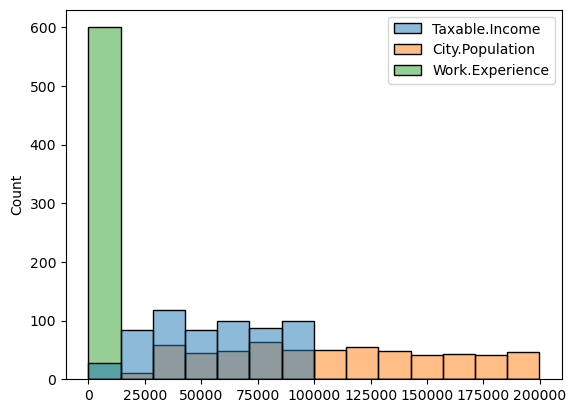

In [6]:
sns.histplot(df)

array([[<AxesSubplot:title={'center':'Taxable.Income'}>]], dtype=object)

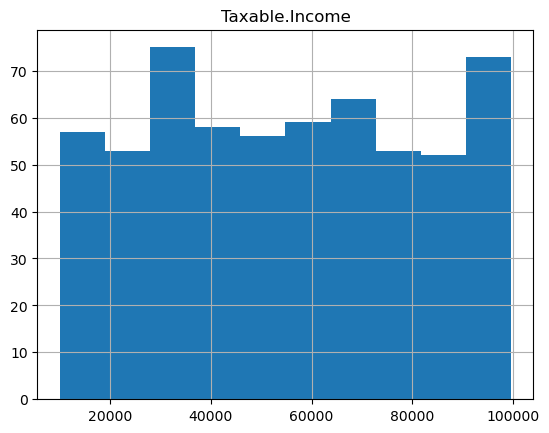

In [8]:
#plotting histogram for taxable income 
df.hist('Taxable.Income')

Undergrad


<IPython.core.display.Javascript object>

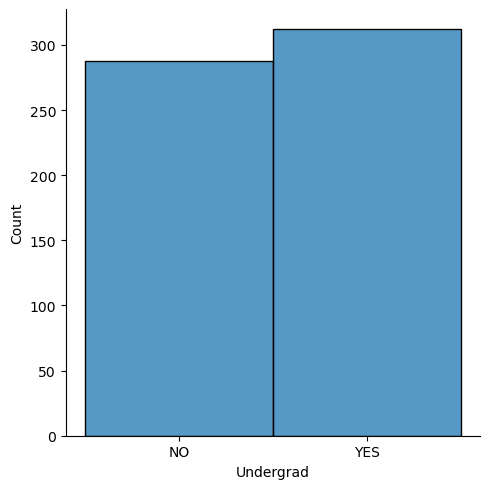

<Figure size 2000x700 with 0 Axes>

Marital.Status


<IPython.core.display.Javascript object>

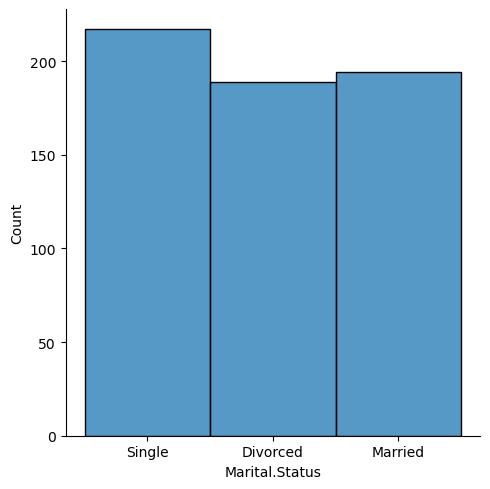

<Figure size 2000x700 with 0 Axes>

Taxable.Income


<IPython.core.display.Javascript object>

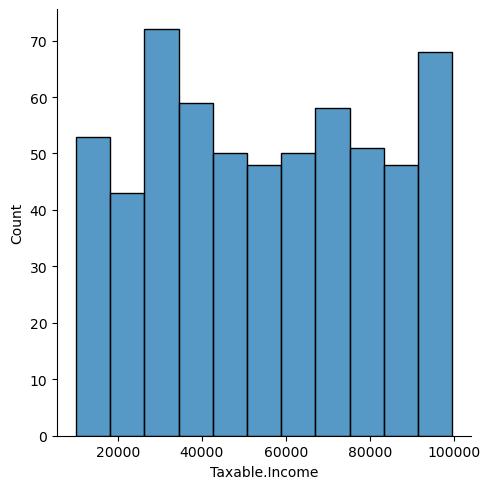

<Figure size 2000x700 with 0 Axes>

City.Population


<IPython.core.display.Javascript object>

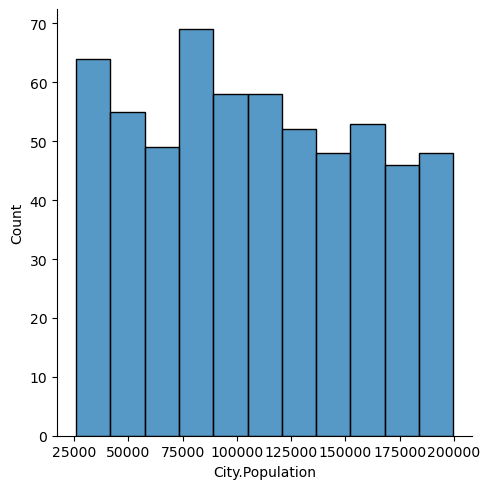

<Figure size 2000x700 with 0 Axes>

Work.Experience


<IPython.core.display.Javascript object>

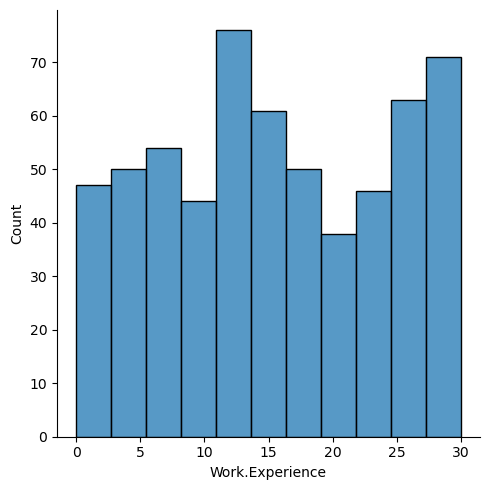

<Figure size 2000x700 with 0 Axes>

Urban


<IPython.core.display.Javascript object>

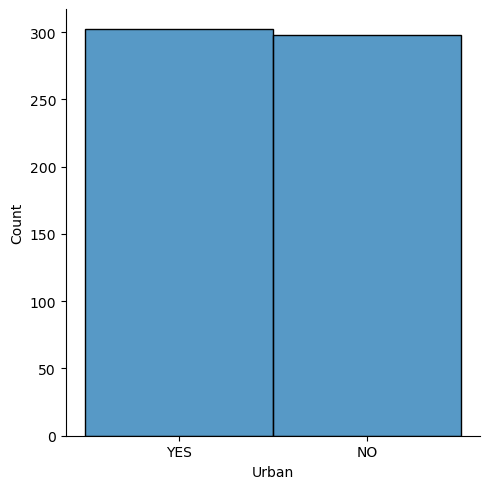

<Figure size 2000x700 with 0 Axes>

In [12]:
#checking distribution of data, analysis for skewness and kurtosis

for n in df.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

Undergrad


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


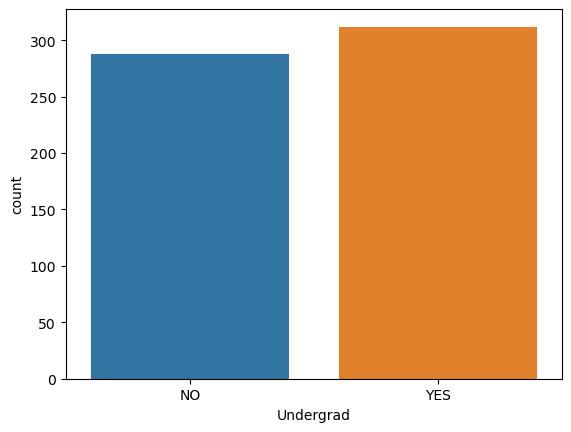

<Figure size 2000x700 with 0 Axes>

Marital.Status


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


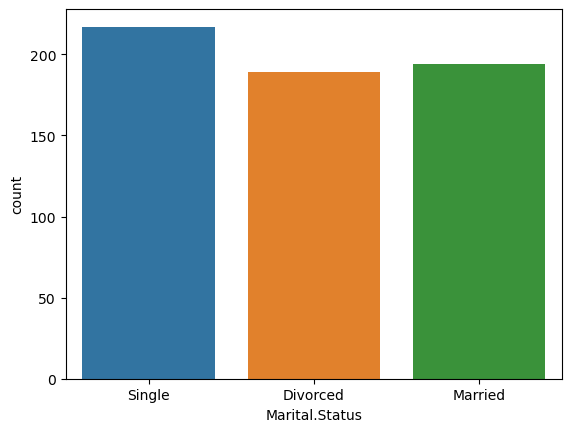

<Figure size 2000x700 with 0 Axes>

Taxable.Income


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


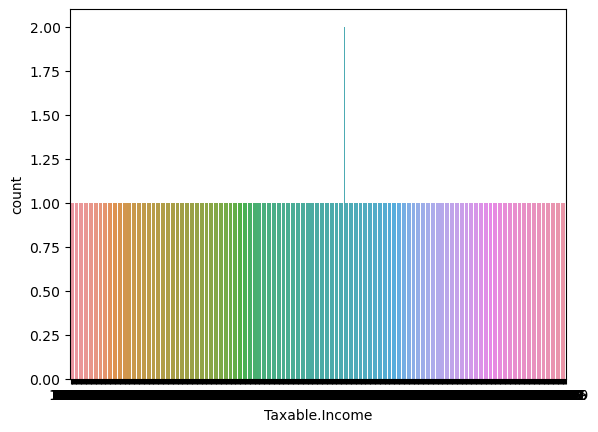

<Figure size 2000x700 with 0 Axes>

City.Population


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


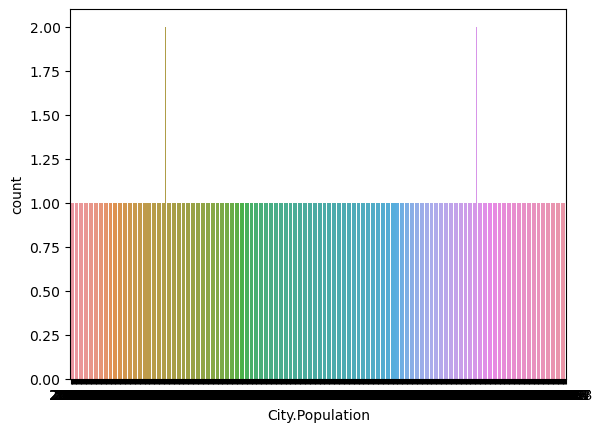

<Figure size 2000x700 with 0 Axes>

Work.Experience


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


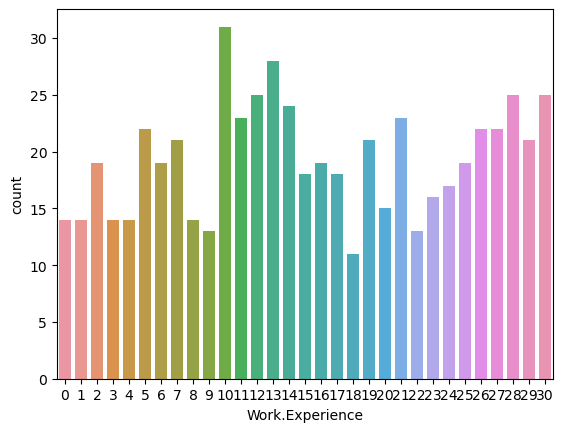

<Figure size 2000x700 with 0 Axes>

Urban


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


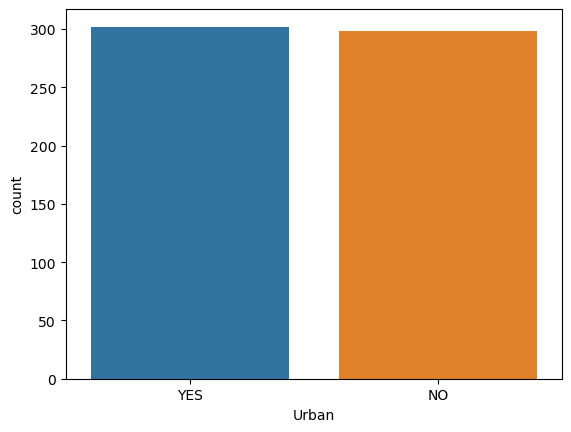

<Figure size 2000x700 with 0 Axes>

In [15]:
#checking data with countplot 

for n in df.columns:
    print(n)
    sns.countplot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

In [18]:
df[df.duplicated()].shape

(0, 6)

In [19]:
df[df.duplicated()]

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban


In [20]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [21]:
encoder=LabelEncoder()
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=encoder.fit_transform(df['Marital.Status'])
df['Urban']=encoder.fit_transform(df['Urban'])

<IPython.core.display.Javascript object>

In [22]:
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,68833,0,2,50047,10,1
1,33700,1,0,134075,18,1
2,36925,0,1,160205,30,1
3,50190,1,2,193264,15,1
4,81002,0,1,27533,28,0
...,...,...,...,...,...,...
595,76340,1,0,39492,7,1
596,69967,1,0,55369,2,1
597,47334,0,0,154058,0,1
598,98592,1,1,180083,17,0


In [23]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x: 1 if x>30000 else 0)
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,2,50047,10,1
1,1,1,0,134075,18,1
2,1,0,1,160205,30,1
3,1,1,2,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,0,39492,7,1
596,1,1,0,55369,2,1
597,1,0,0,154058,0,1
598,1,1,1,180083,17,0


In [24]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [25]:
df.isnull().sum()

Taxable.Income     0
Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [26]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population',
       'Work.Experience', 'Urban'])
df

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,2,50047,10,1
1,1,1,0,134075,18,1
2,1,0,1,160205,30,1
3,1,1,2,193264,15,1
4,1,0,1,27533,28,0
...,...,...,...,...,...,...
595,1,1,0,39492,7,1
596,1,1,0,55369,2,1
597,1,0,0,154058,0,1
598,1,1,1,180083,17,0


In [27]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [29]:
Y.value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)
model=RandomForestClassifier()
parameters={'n_estimators':[20,40,50,70,90,100],'criterion':['gini','entropy'],'max_features':[3,4,5]}

In [32]:
grid=GridSearchCV(model,parameters,cv=10)
grid.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [3, 4, 5],
                         'n_estimators': [20, 40, 50, 70, 90, 100]})

In [33]:
grid.best_score_

0.7604166666666666

In [35]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 4, 'n_estimators': 70}

In [36]:
final_model=RandomForestClassifier(criterion='gini',max_features=3, n_estimators=70)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=70)

In [37]:
y_test_pred=final_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
ytp=pd.DataFrame(y_test_pred)
ytp

,0
0,1
1,1
2,1
3,1
4,1
...,...
115,1
116,1
117,1
118,1


In [39]:
ytp.value_counts()

1    113
0      7
dtype: int64

In [41]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.04      0.14      0.06         7
           1       0.94      0.79      0.86       113

    accuracy                           0.75       120
   macro avg       0.49      0.47      0.46       120
weighted avg       0.88      0.75      0.81       120

